In [7]:
import pandas as pd
import matplotlib as mp 


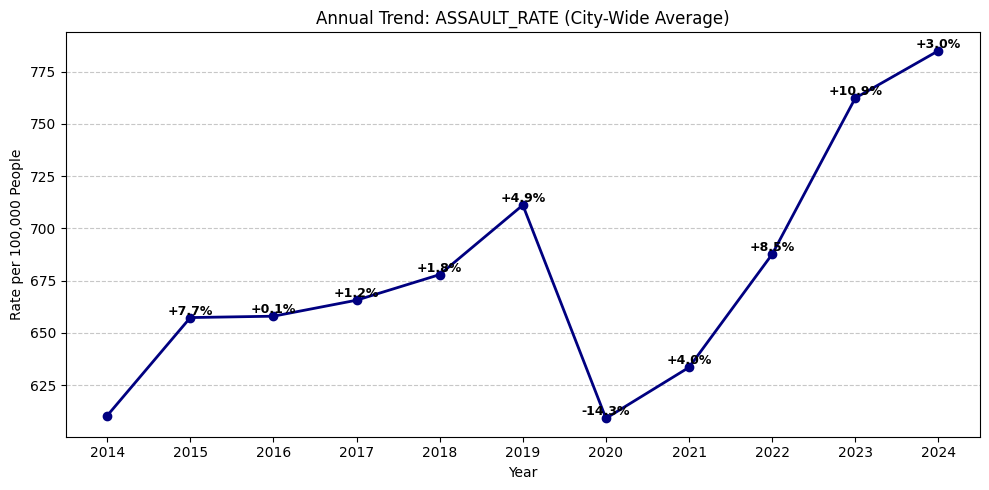


Summary for ASSAULT_RATE:
  2014 to 2015 Change: +7.68%
  2015 to 2016 Change: +0.10%
  2016 to 2017 Change: +1.16%
  2017 to 2018 Change: +1.84%
  2018 to 2019 Change: +4.91%
  2019 to 2020 Change: -14.34%
  2020 to 2021 Change: +4.01%
  2021 to 2022 Change: +8.54%
  2022 to 2023 Change: +10.86%
  2023 to 2024 Change: +2.97%


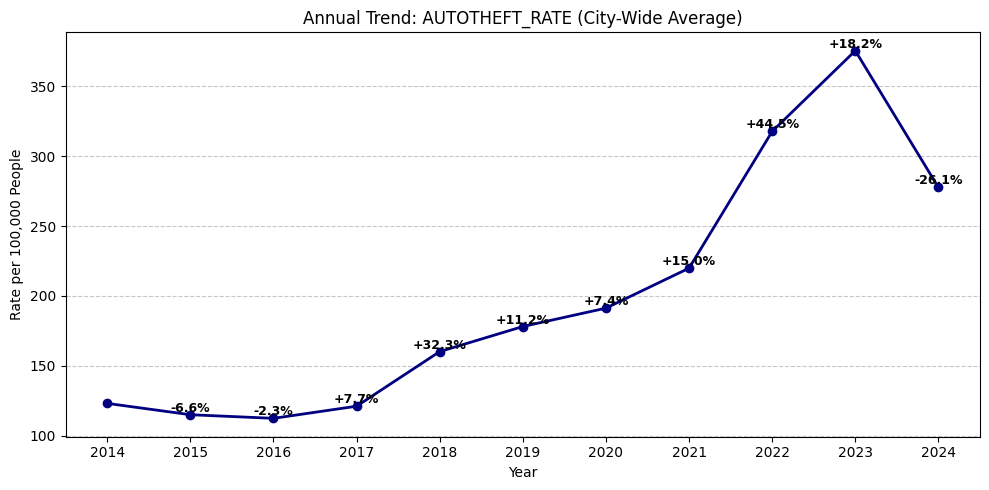


Summary for AUTOTHEFT_RATE:
  2014 to 2015 Change: -6.59%
  2015 to 2016 Change: -2.26%
  2016 to 2017 Change: +7.73%
  2017 to 2018 Change: +32.31%
  2018 to 2019 Change: +11.22%
  2019 to 2020 Change: +7.39%
  2020 to 2021 Change: +14.97%
  2021 to 2022 Change: +44.54%
  2022 to 2023 Change: +18.17%
  2023 to 2024 Change: -26.08%


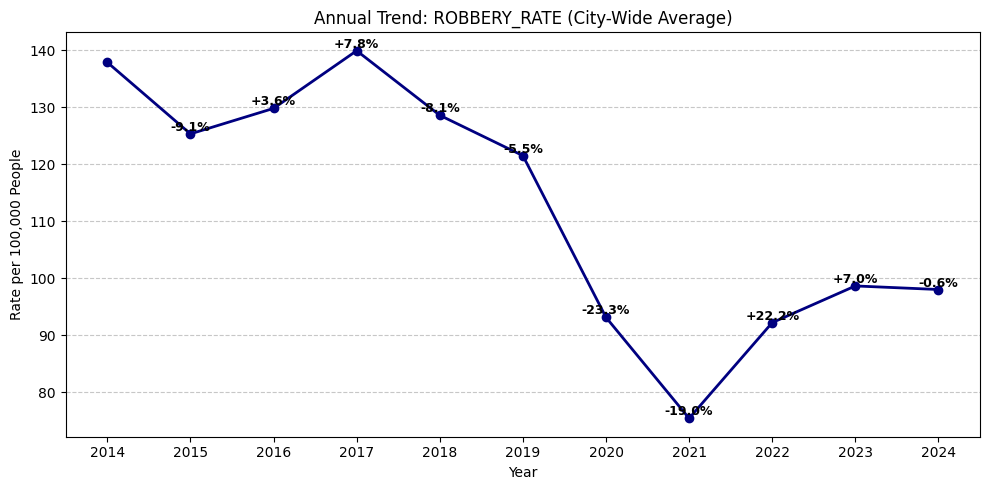


Summary for ROBBERY_RATE:
  2014 to 2015 Change: -9.09%
  2015 to 2016 Change: +3.57%
  2016 to 2017 Change: +7.79%
  2017 to 2018 Change: -8.09%
  2018 to 2019 Change: -5.50%
  2019 to 2020 Change: -23.33%
  2020 to 2021 Change: -19.00%
  2021 to 2022 Change: +22.23%
  2022 to 2023 Change: +6.97%
  2023 to 2024 Change: -0.63%


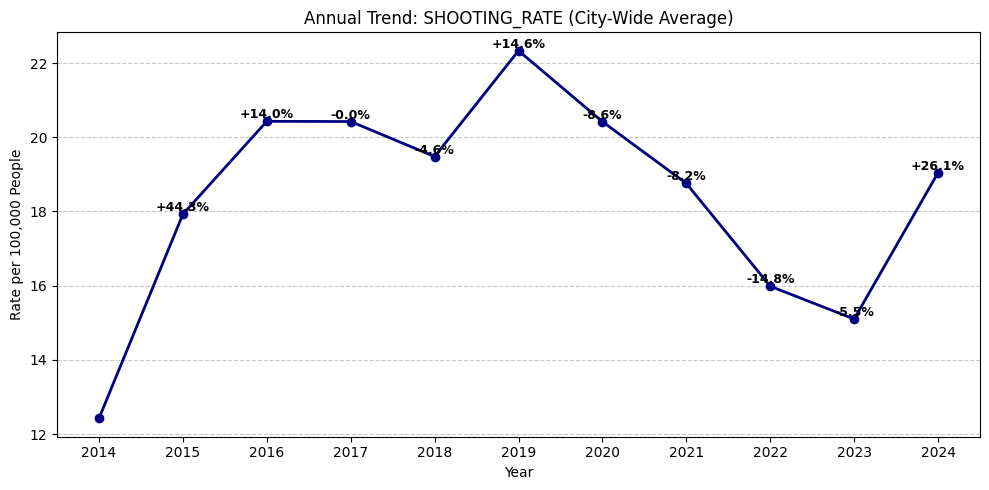


Summary for SHOOTING_RATE:
  2014 to 2015 Change: +44.28%
  2015 to 2016 Change: +13.98%
  2016 to 2017 Change: -0.03%
  2017 to 2018 Change: -4.62%
  2018 to 2019 Change: +14.64%
  2019 to 2020 Change: -8.56%
  2020 to 2021 Change: -8.15%
  2021 to 2022 Change: -14.78%
  2022 to 2023 Change: -5.53%
  2023 to 2024 Change: +26.12%


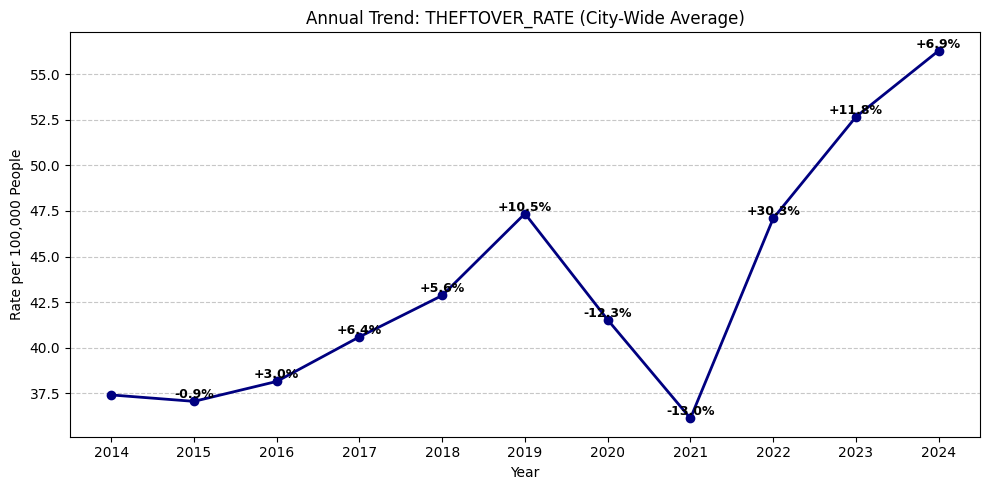


Summary for THEFTOVER_RATE:
  2014 to 2015 Change: -0.94%
  2015 to 2016 Change: +2.95%
  2016 to 2017 Change: +6.41%
  2017 to 2018 Change: +5.59%
  2018 to 2019 Change: +10.47%
  2019 to 2020 Change: -12.30%
  2020 to 2021 Change: -13.01%
  2021 to 2022 Change: +30.33%
  2022 to 2023 Change: +11.83%
  2023 to 2024 Change: +6.89%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuration
# List of columns we are analyzing
fix = ['ASSAULT_RATE', 'AUTOTHEFT_RATE', 'ROBBERY_RATE', 'SHOOTING_RATE', 'THEFTOVER_RATE']

# Ensure 'YEAR' is numeric and sorted
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df = df.dropna(subset=['YEAR']).sort_values('YEAR')

# 2. Calculate City-Wide Averages per Year
# We only care about 2014 onwards for the trend analysis
trend_df = df[df['YEAR'] >= 2014].groupby('YEAR')[fix].mean()

# 3. Create individual plots for each crime rate
for col in fix:
    plt.figure(figsize=(10, 5))
    
    # Plot the raw rate
    plt.plot(trend_df.index, trend_df[col], marker='o', linestyle='-', linewidth=2, color='navy')
    
    # Calculate YoY Percentage Changes
    yoy_changes = trend_df[col].pct_change() * 100
    
    # Add Text Labels for Percentage Changes
    for i in range(1, len(trend_df)):
        year = trend_df.index[i]
        val = trend_df[col].iloc[i]
        change = yoy_changes.iloc[i]
        
        # Display the % change above the point
        plt.text(year, val, f'{change:+.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.title(f'Annual Trend: {col} (City-Wide Average)')
    plt.ylabel('Rate per 100,000 People')
    plt.xlabel('Year')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(trend_df.index)
    plt.tight_layout()
    plt.show()

    # 4. Print Summary for your Research Paper
    print(f"\nSummary for {col}:")
    for year, change in yoy_changes.dropna().items():
        print(f"  {int(year-1)} to {int(year)} Change: {change:+.2f}%")

In [ ]:
# okay need to incorporate this into the master pipeline to fix the rates there and train with this if the otehr freaters not workingc(still think we should)
# Rigorous Coefficients derived from your 2014-2019 Trend Analysis
# These are 'Step-Back' multipliers (1 / (1 + average_growth))
back_mults = {
    'ASSAULT_RATE': 0.969,
    'AUTOTHEFT_RATE': 0.939,
    'ROBBERY_RATE': 1.023,
    'SHOOTING_RATE': 0.879,
    'THEFTOVER_RATE': 0.953
}

# 1. Isolate the 2014 data as our Baseline
df_2014 = df[df['YEAR'] == 2014].copy()
backfilled_years = []

# 2. Project backwards from 2013 to 2010
for year in [2013, 2012, 2011, 2010]:
    dist = 2014 - year  # How many steps back from 2014
    temp_df = df_2014.copy()
    temp_df['YEAR'] = year
    
    for col, m in back_mults.items():
        # Apply the compounding multiplier
        temp_df[col] = temp_df[col] * (m ** dist)
    
    backfilled_years.append(temp_df)

# 3. Merge and finalize
df_final = pd.concat([df] + backfilled_years, ignore_index=True)
df_final = df_final.sort_values(['NEIGHBORHOOD_NAME', 'YEAR'])